In [205]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
#Importing the csv dataset
data=pd.read_csv("online_retail.csv", encoding='latin1')
df=pd.DataFrame(data)

In [207]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [209]:
#Number of Rows
#df.count()

In [210]:
# Display Number of null values in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [211]:
#Country-wise count of stock purchase
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [212]:
#Check whether all values in Quantity is valid
negative_quntity=(df['Quantity']<=0).sum()
print(negative_quntity)

10624


In [213]:
#Removing Invalid Values
df.drop(df[df['Quantity']<=0].index,inplace=True)

In [214]:
#Check whether all values in Unit_price is valid
negative_unit_price=(df['UnitPrice']<=0).sum()
print(negative_unit_price)

1181


In [215]:
df.drop(df[df['UnitPrice']<=0].index,inplace=True)

In [216]:
# Display Number of null values in each column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64


In [217]:
#Replacing nan in description using previous stockcode description.
desc_map = (
    df.dropna(subset=['Description'])
      .drop_duplicates('StockCode')
      .set_index('StockCode')['Description']
)

df['Description'] = df['StockCode'].map(desc_map)

In [218]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64


In [219]:
#Replacing nan values in description with unknown
df['Description'] = df['Description'].fillna('Unknown')

In [220]:
#Removing nan values in customerid.
df.drop(df[df['CustomerID'].isna()].index,inplace=True)

In [221]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [223]:
#Converting InvoiceDate to DateTime format if any values are other than datetime make it as nan.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
print(df['InvoiceDate'].isna().sum())

0


In [224]:
#df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [225]:
#Converting Invoice_No to numeric datatype.
df['Invoice_No'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')
print(df['Invoice_No'].isna().sum())

0


In [226]:
#Creating seperate columns for date and time.
df['date_only']=df['InvoiceDate'].dt.date
df['time_only']=df['InvoiceDate'].dt.time

In [227]:
#Key Performance Indicators
df['revenue']=df['Quantity']*df['UnitPrice']

In [228]:
total_revenue=df['revenue'].sum()
print(total_revenue)

8911407.904


In [229]:
#Country-Wise Revenue
country_revenue = df.groupby('Country')['revenue'].sum()
country_revenue.nlargest(5)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: revenue, dtype: float64

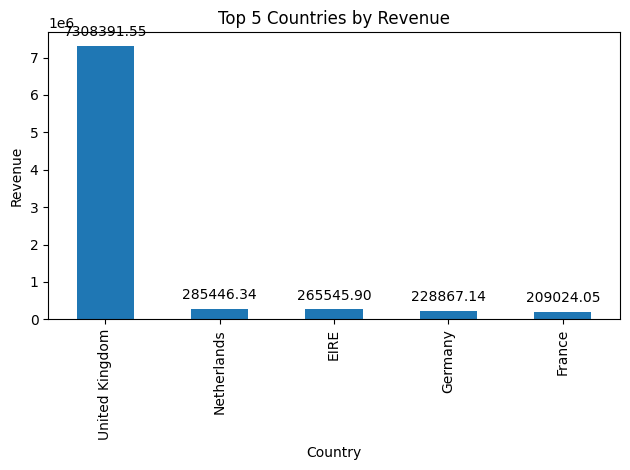

In [230]:
#Plot the country-wise revenue
ax = country_revenue.nlargest(5).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 5 Countries by Revenue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [231]:
df = df.sort_values(['CustomerID', 'InvoiceDate'])

In [232]:
df['prev_invoice_date'] = df.groupby('CustomerID')['InvoiceDate'].shift(1)
df['days_between'] = (
    df['InvoiceDate'] - df['prev_invoice_date']
).dt.days

In [233]:
customer_metrics = (
    df.groupby(['CustomerID', 'Country'])
      .agg(
          Avg_Recency_Days=('days_between', 'mean'),
          Number_of_Invoices=('InvoiceNo', 'nunique'),
          Total_Revenue=('revenue', 'sum')
      )
      .reset_index()
)
customer_metrics['Avg_Recency_Days'] = (
    customer_metrics['Avg_Recency_Days']
        .fillna(0)
        .round(2)
)

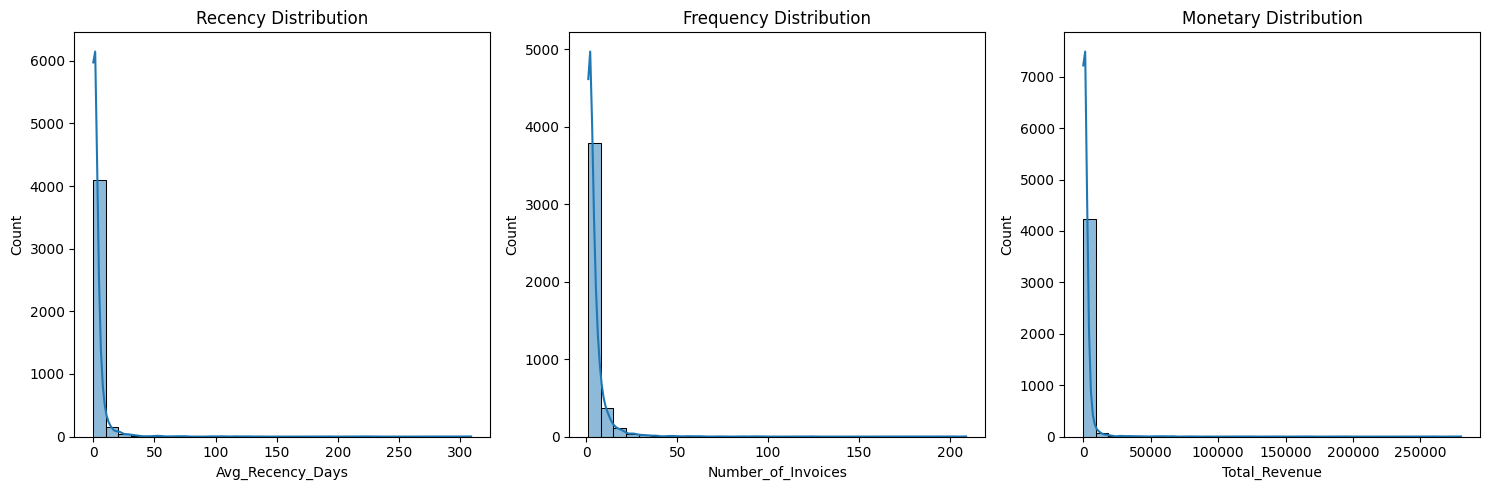

In [234]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(customer_metrics['Avg_Recency_Days'], bins=30, kde=True)
plt.title("Recency Distribution")

plt.subplot(1,3,2)
sns.histplot(customer_metrics['Number_of_Invoices'], bins=30, kde=True)
plt.title("Frequency Distribution")

plt.subplot(1,3,3)
sns.histplot(customer_metrics['Total_Revenue'], bins=30, kde=True)
plt.title("Monetary Distribution")

plt.tight_layout()
plt.show()

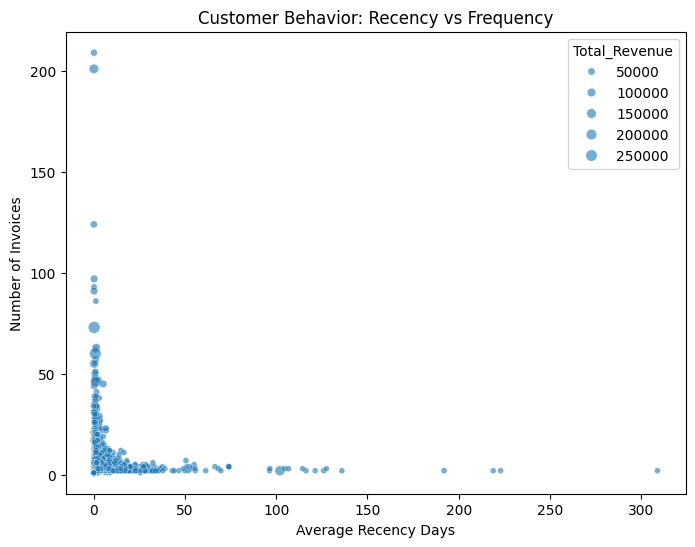

In [235]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=customer_metrics,
    x='Avg_Recency_Days',
    y='Number_of_Invoices',
    size='Total_Revenue',
    alpha=0.6
)

plt.title("Customer Behavior: Recency vs Frequency")
plt.xlabel("Average Recency Days")
plt.ylabel("Number of Invoices")
plt.show()

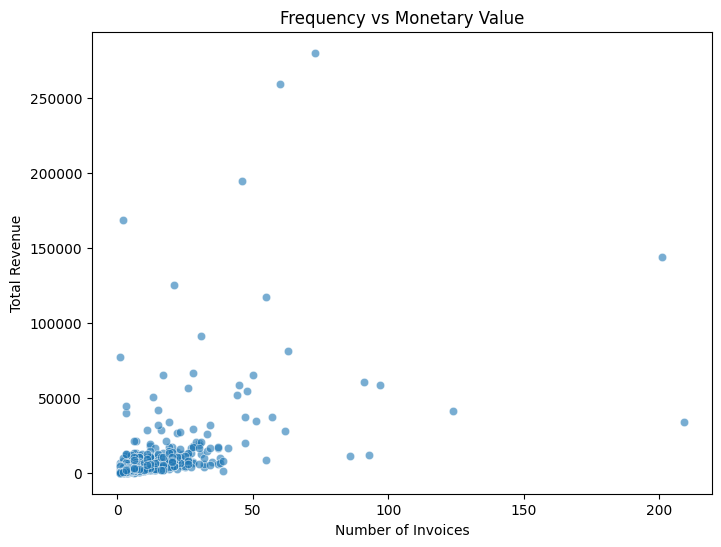

In [236]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=customer_metrics,
    x='Number_of_Invoices',
    y='Total_Revenue',
    alpha=0.6
)

plt.title("Frequency vs Monetary Value")
plt.xlabel("Number of Invoices")
plt.ylabel("Total Revenue")
plt.show()

In [237]:
customer_metrics['R_score'] = pd.qcut(customer_metrics['Avg_Recency_Days'].rank(method='first'), 5, labels=[5,4,3,2,1])
customer_metrics['F_score'] = pd.qcut(customer_metrics['Number_of_Invoices'].rank(method='first'), 5, labels=[1,2,3,4,5])
customer_metrics['M_score'] = pd.qcut(customer_metrics['Total_Revenue'], 5, labels=[1,2,3,4,5])

customer_metrics['RFM_Score'] = (
    customer_metrics['R_score'].astype(str) +
    customer_metrics['F_score'].astype(str) +
    customer_metrics['M_score'].astype(str)
)


C:\Users\ashok\AppData\Local\Temp\ipykernel_26620\2393034238.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_matrix = customer_metrics.pivot_table(


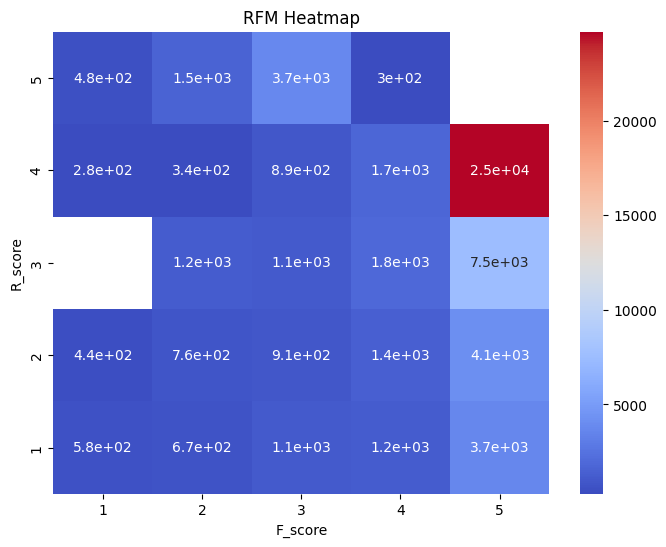

In [238]:
rfm_matrix = customer_metrics.pivot_table(
    index='R_score',
    columns='F_score',
    values='Total_Revenue',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(rfm_matrix, cmap='coolwarm', annot=True)

plt.title("RFM Heatmap")
plt.show()

In [239]:
customer_metrics.to_csv(
    'Processed_Data/Customer_Recency_Frequency_Monetary_By_Country.csv',
    index=False
)

In [240]:
#Yearly_Revenue
yearly_revenue = df.groupby(df['date_only'].apply(lambda x: x.year))['revenue'].sum()
yearly_revenue

date_only
2010     572713.890
2011    8338694.014
Name: revenue, dtype: float64

In [241]:
#Monthly_Revenue
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['revenue'].sum()
print(monthly_revenue)

InvoiceDate
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: revenue, dtype: float64


In [242]:
print(monthly_revenue)

InvoiceDate
2010-12     572713.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518192.790
Freq: M, Name: revenue, dtype: float64


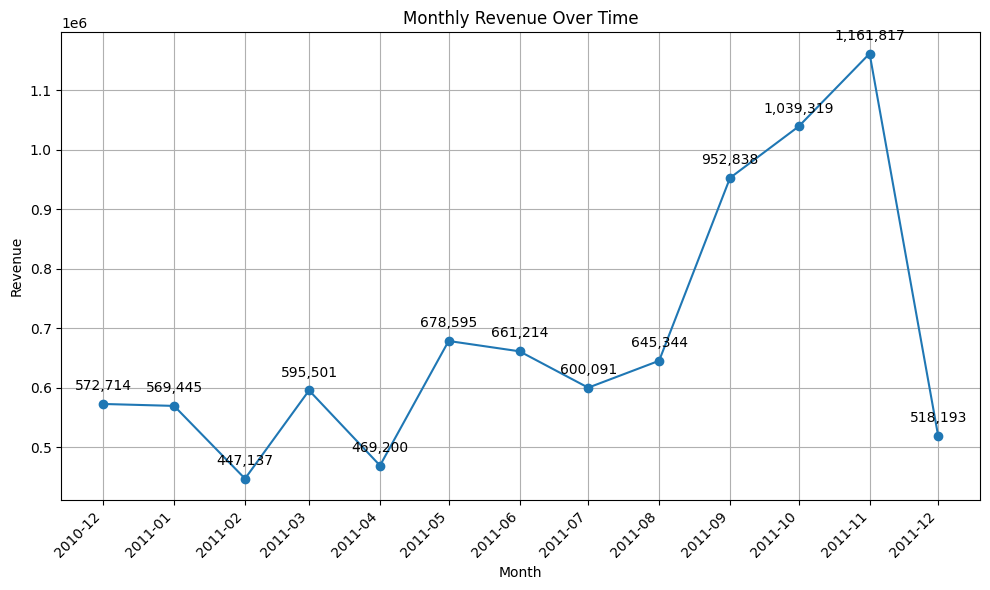

In [243]:
plt.figure(figsize=(10, 6))
# Convert PeriodIndex to datetime for plotting
monthly_revenue_dates = monthly_revenue.index.to_timestamp()
plt.plot(monthly_revenue_dates, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
# Adjust x-ticks to show month-year and rotate for readability
plt.xticks(monthly_revenue_dates, monthly_revenue_dates.strftime('%Y-%m'), rotation=45, ha='right')
for i, txt in enumerate(monthly_revenue.values):
    plt.annotate(f'{txt:,.0f}', (monthly_revenue_dates[i], monthly_revenue.values[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.show()

In [244]:
#Weekly_Revenue
df['date_only'] = pd.to_datetime(df['date_only'])

weekly_revenue = (
    df.groupby([
        df['date_only'].dt.isocalendar().year,
        df['date_only'].dt.isocalendar().week
    ])['revenue']
    .sum()
)
weekly_revenue

year  week
2010  48      149386.330
      49      213447.720
      50      163770.730
      51       46109.110
2011  1       114865.270
      2       154714.940
      3       175757.980
      4       105288.770
      5       106095.230
      6        88015.420
      7       126050.400
      8       130687.360
      9       117600.820
      10      112338.000
      11      138278.820
      12      129918.430
      13      143977.030
      14      119961.920
      15      135142.201
      16      116090.020
      17       73474.560
      18      131329.180
      19      178850.250
      20      196269.920
      21      146976.900
      22      102371.900
      23      194019.080
      24      171940.300
      25      112818.820
      26      116479.920
      27      131383.740
      28      118297.880
      29      167519.810
      30      164667.901
      31      156185.190
      32      143652.210
      33      168080.690
      34      148051.260
      35      114046.780
      36      

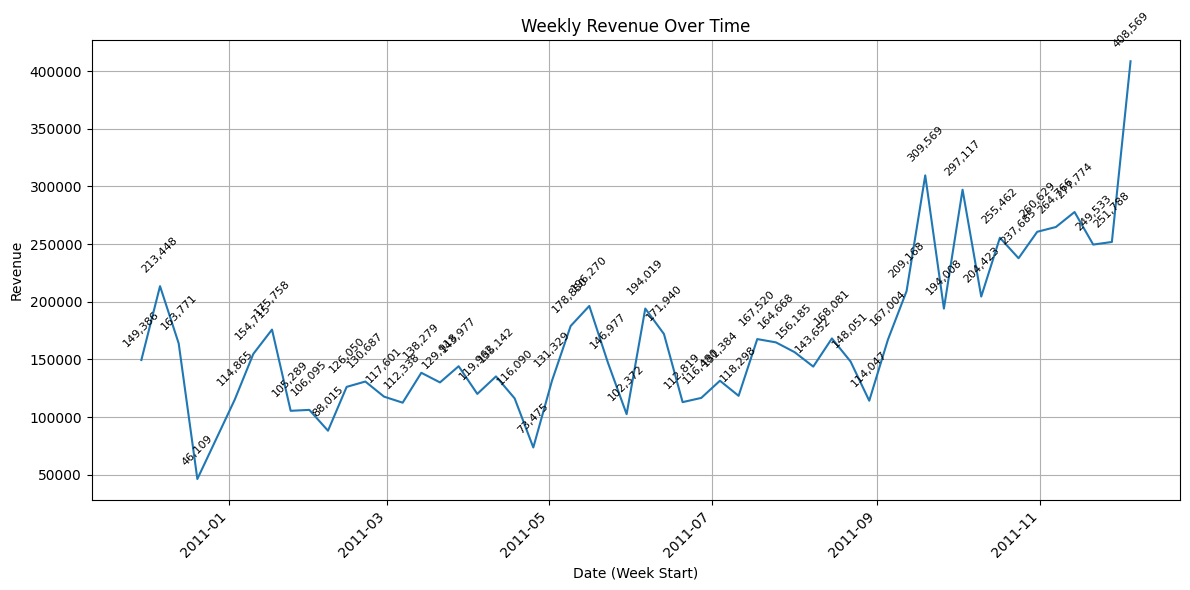

In [245]:
weekly_revenue_plot_index = [
    pd.to_datetime(f"{year}-W{week}-1", format='%Y-W%W-%w')
    for year, week in weekly_revenue.index
]

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.plot(weekly_revenue_plot_index, weekly_revenue.values)
ax.set_xlabel('Date (Week Start)')
ax.set_ylabel('Revenue')
ax.set_title('Weekly Revenue Over Time')
ax.grid(True)

# Add data labels
for i, txt in enumerate(weekly_revenue.values):
    ax.annotate(f'{txt:,.0f}', (weekly_revenue_plot_index[i], weekly_revenue.values[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, rotation=45)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [246]:
YoY_Growt = yearly_revenue.pct_change() * 100
YoY_Growt = YoY_Growt.fillna(0)
YoY_Growt

date_only
2010       0.000000
2011    1355.996469
Name: revenue, dtype: float64

In [247]:
MOM_Growt = (monthly_revenue.pct_change() * 100).round(2)
MOM_Growt = MOM_Growt.fillna(0)
MOM_Growt

InvoiceDate
2010-12     0.00
2011-01    -0.57
2011-02   -21.48
2011-03    33.18
2011-04   -21.21
2011-05    44.63
2011-06    -2.56
2011-07    -9.24
2011-08     7.54
2011-09    47.65
2011-10     9.08
2011-11    11.79
2011-12   -55.40
Freq: M, Name: revenue, dtype: float64

In [248]:
mom_growth_df = MOM_Growt.reset_index()
mom_growth_df.columns = ['Month', 'MOM_Growth']
print("MOM_Growth.csv created successfully!")

MOM_Growth.csv created successfully!


In [249]:
WOW_Growt = weekly_revenue.pct_change() * 100
WOW_Growt = WOW_Growt.fillna(0)
WOW_Growt

year  week
2010  48        0.000000
      49       42.883034
      50      -23.273610
      51      -71.845329
2011  1       149.116216
      2        34.692532
      3        13.601169
      4       -40.094458
      5         0.765951
      6       -17.041115
      7        43.213996
      8         3.678656
      9       -10.013623
      10       -4.475156
      11       23.091759
      12       -6.046038
      13       10.821098
      14      -16.679820
      15       12.654250
      16      -14.097877
      17      -36.708978
      18       78.741023
      19       36.184700
      20        9.739807
      21      -25.114913
      22      -30.348306
      23       89.523766
      24      -11.379695
      25      -34.384888
      26        3.245115
      27       12.795184
      28       -9.960030
      29       41.608463
      30       -1.702431
      31       -5.151405
      32       -8.024436
      33       17.005294
      34      -11.916556
      35      -22.968045
      36      

In [250]:
wow_growth_df=pd.DataFrame(WOW_Growt)

In [251]:
top_products = df.groupby('StockCode')['revenue'].sum()
top_products.nlargest(5)

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
Name: revenue, dtype: float64

In [252]:
top_countries = df.groupby('Country')['revenue'].sum()
top_countries.nlargest(5)

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Name: revenue, dtype: float64

In [253]:
total_orders = df['InvoiceNo'].nunique()
print(total_orders)
aov = df.groupby('InvoiceNo')['revenue'].sum().mean()
aov

18532


480.86595639974104

In [254]:
total_orders_no = df['InvoiceNo'].unique()
print(total_orders_no)

['541431' '537626' '542237' ... '554065' '570715' '573167']


In [255]:
#Number of customers repeatedly purchasing products.
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().gt(1).sum()
repeat_customers

2845

In [256]:
#Orders taken per month by each country with corresponding revenue
country_revenue_monthly = (
    df.groupby([
        'Country',
        df['date_only'].dt.year,
        df['date_only'].dt.month
    ])['revenue']
    .sum()
)

orders_ = (
    df.groupby([
        'Country',
        df['date_only'].dt.year,
        df['date_only'].dt.month
    ])['InvoiceNo']
    .nunique()
)
# Removed the incorrect Series indexing and fixed the nlargest call.
print(country_revenue_monthly.nlargest(5))
print(orders_)

Country         date_only  date_only
United Kingdom  2011       11           980645.750
                           10           824766.220
                           9            796780.272
                           5            551568.820
                           6            524915.480
Name: revenue, dtype: float64
Country      date_only  date_only
Australia    2010       12           3
             2011       1            9
                        2            5
                        3            3
                        4            2
                                    ..
Unspecified  2011       4            1
                        5            1
                        6            1
                        7            3
                        8            2
Name: InvoiceNo, Length: 287, dtype: int64


In [257]:
# Monthly revenue
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
monthly_revenue_by_year_month = (
  df.groupby(['Year', 'Month'])
      .agg(
          Unique_Invoices=('InvoiceNo', 'nunique'),
          Total_Quantity=('Quantity', 'sum'),
          Total_Revenue=('revenue', 'sum')
      )
      .reset_index()
)
print("Monthly Revenue:\n", monthly_revenue_by_year_month)

Monthly Revenue:
     Year  Month  Unique_Invoices  Total_Quantity  Total_Revenue
0   2010     12             1400          312265     572713.890
1   2011      1              987          349098     569445.040
2   2011      2              997          265622     447137.350
3   2011      3             1321          348503     595500.760
4   2011      4             1149          292222     469200.361
5   2011      5             1555          373601     678594.560
6   2011      6             1393          363699     661213.690
7   2011      7             1331          369420     600091.011
8   2011      8             1280          398121     645343.900
9   2011      9             1755          544897     952838.382
10  2011     10             1929          593900    1039318.790
11  2011     11             2657          669051    1161817.380
12  2011     12              778          287413     518192.790


In [258]:
# Create time features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

# Year-Month-Week level metrics
time_summary = (
    df.groupby(['Year', 'Month', 'Week'])
      .agg(
          Unique_Invoices=('InvoiceNo', 'nunique'),
          Total_Quantity=('Quantity', 'sum'),
          Total_Revenue=('revenue', 'sum')
      )
      .reset_index()
)

# View result
print(time_summary)

# Save to CSV
time_summary.to_csv('Processed_Data/Year_Month_Week_Metrics.csv', index=False)

print("Year_Month_Week_Metrics.csv created successfully!")


    Year  Month  Week  Unique_Invoices  Total_Quantity  Total_Revenue
0   2010     12    48              402           83645      149386.33
1   2010     12    49              489          101373      213447.72
2   2010     12    50              401           96438      163770.73
3   2010     12    51              108           30809       46109.11
4   2011      1     1              224           70192      114865.27
..   ...    ...   ...              ...             ...            ...
58  2011     11    46              669          157615      277773.94
59  2011     11    47              594          142370      249532.68
60  2011     11    48              339           78499      142164.58
61  2011     12    48              294           61923      109623.64
62  2011     12    49              484          225490      408569.15

[63 rows x 6 columns]
Year_Month_Week_Metrics.csv created successfully!


In [259]:
# Create a proper date column for monthly calculation
time_summary['Year_Month'] = pd.to_datetime(time_summary['Year'].astype(str) + '-' + time_summary['Month'].astype(str))

# Aggregate Monthly Revenue
monthly_revenue = time_summary.groupby('Year_Month')['Total_Revenue'].sum().sort_index()

# Calculate MoM Growth (%)
mom_growth = monthly_revenue.pct_change() * 100
mom_growth = mom_growth.fillna(0)
# Create Weekly identifier
time_summary['Year_Week'] = time_summary['Year'].astype(str) + '-W' + time_summary['Week'].astype(str)

# Aggregate Weekly Revenue
weekly_revenue = time_summary.groupby(['Year', 'Week'])['Total_Revenue'].sum().reset_index()
weekly_revenue['Year_Week_Date'] = pd.to_datetime(
    weekly_revenue['Year'].astype(str) +
    weekly_revenue['Week'].astype(str) + '1',
    format='%Y%W%w'
)


weekly_revenue = weekly_revenue.sort_values('Year_Week_Date')

# Calculate WoW Growth (%)
weekly_revenue['WoW_Growth_%'] = weekly_revenue['Total_Revenue'].pct_change() * 100
weekly_revenue['WoW_Growth_%'] = weekly_revenue['WoW_Growth_%'].fillna(0)

# Create final MoM dataframe
mom_df = mom_growth.reset_index()
mom_df.columns = ['Year_Month', 'MoM_Growth_%']
mom_df.to_csv('Processed_Data/MOM_Growth.csv',index=False)
weekly_revenue[['Year', 'Week', 'Total_Revenue', 'WoW_Growth_%']].to_csv('Processed_Data/WOW_Growth.csv',index=False)
# Display results
mom_df.head(), weekly_revenue[['Year', 'Week', 'Total_Revenue', 'WoW_Growth_%']].head()

(  Year_Month  MoM_Growth_%
 0 2010-12-01      0.000000
 1 2011-01-01     -0.570765
 2 2011-02-01    -21.478401
 3 2011-03-01     33.180724
 4 2011-04-01    -21.209108,
    Year  Week  Total_Revenue  WoW_Growth_%
 0  2010    48      149386.33      0.000000
 1  2010    49      213447.72     42.883034
 2  2010    50      163770.73    -23.273610
 3  2010    51       46109.11    -71.845329
 4  2011     1      114865.27    149.116216)

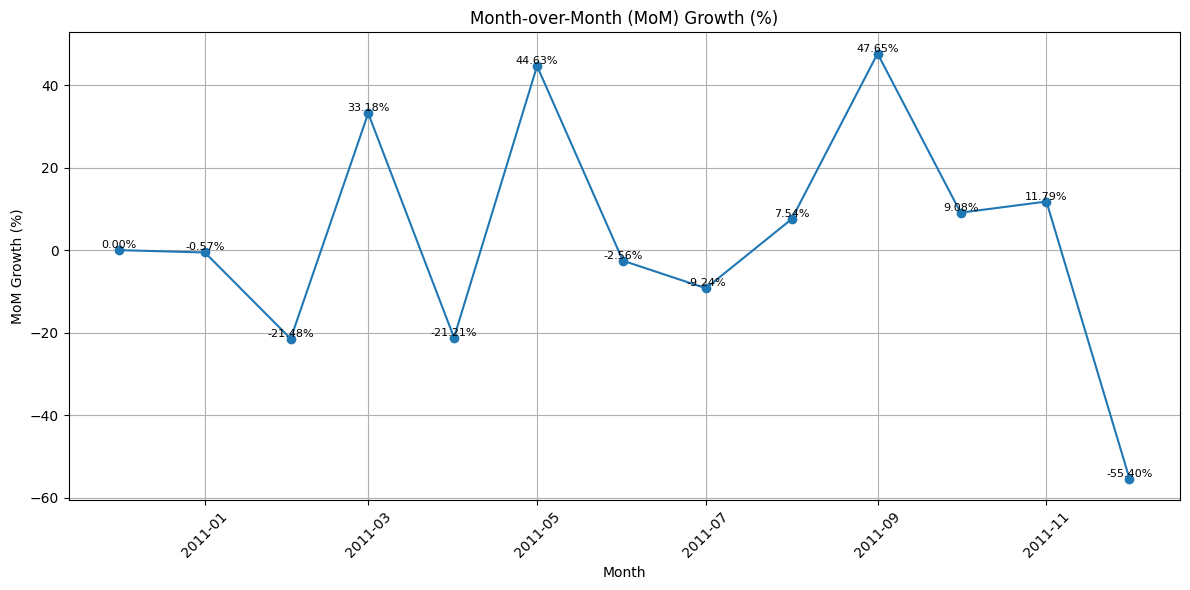

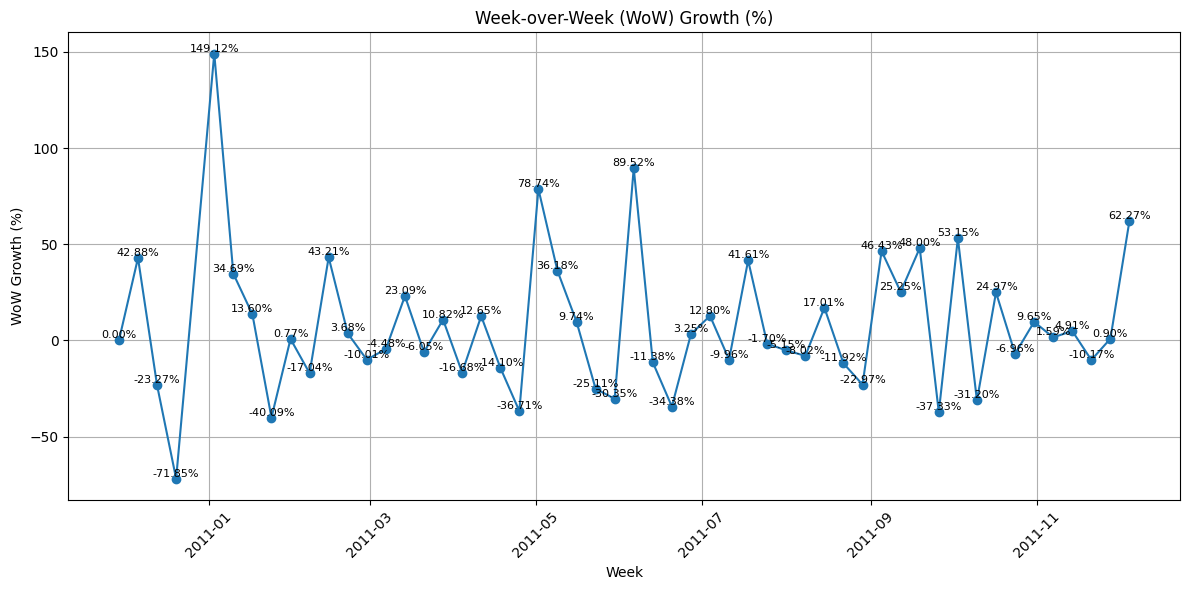

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

mom_df = pd.read_csv("Processed_Data/MOM_Growth.csv")
wow_df = pd.read_csv("Processed_Data/WOW_Growth.csv")

mom_df['Year_Month'] = pd.to_datetime(mom_df['Year_Month'])

wow_df['Year_Week_Date'] = pd.to_datetime(
    wow_df['Year'].astype(str) + wow_df['Week'].astype(str) + '1',
    format='%Y%W%w'
)

plt.figure(figsize=(12, 6))
plt.plot(mom_df['Year_Month'], mom_df['MoM_Growth_%'], marker='o')
plt.title("Month-over-Month (MoM) Growth (%)")
plt.xlabel("Month")
plt.ylabel("MoM Growth (%)")
plt.xticks(rotation=45)
for x, y in zip(mom_df['Year_Month'], mom_df['MoM_Growth_%']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(wow_df['Year_Week_Date'], wow_df['WoW_Growth_%'], marker='o')
plt.title("Week-over-Week (WoW) Growth (%)")
plt.xlabel("Week")
plt.ylabel("WoW Growth (%)")
plt.xticks(rotation=45)
for x, y in zip(wow_df['Year_Week_Date'], wow_df['WoW_Growth_%']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [261]:
# Create country-level business metrics
country_summary = (
    df.groupby('Country')
      .agg(
          Unique_Customers=('CustomerID', 'nunique'),
          Unique_Invoices=('InvoiceNo', 'nunique'),
          Total_Quantity=('Quantity', 'sum'),
          Total_Revenue=('revenue', 'sum')
      )
      .reset_index()
)

# Calculate Revenue_per_Customer after aggregation
country_summary['Revenue_per_Customer'] = (
    country_summary['Total_Revenue'] /
    country_summary['Unique_Customers']
)

# View result
print(country_summary)

# Save to CSV
country_summary.to_csv('Processed_Data/Country_Level_Business_Metrics.csv', index=False)

print("Country_Level_Business_Metrics.csv created successfully!")

                 Country  Unique_Customers  Unique_Invoices  Total_Quantity  \
0              Australia                 9               57           83901   
1                Austria                11               17            4881   
2                Bahrain                 2                2             260   
3                Belgium                25               98           23237   
4                 Brazil                 1                1             356   
5                 Canada                 4                6            2763   
6        Channel Islands                 9               26            9491   
7                 Cyprus                 8               16            6361   
8         Czech Republic                 1                2             671   
9                Denmark                 9               18            8235   
10                  EIRE                 3              260          140275   
11    European Community                 1          

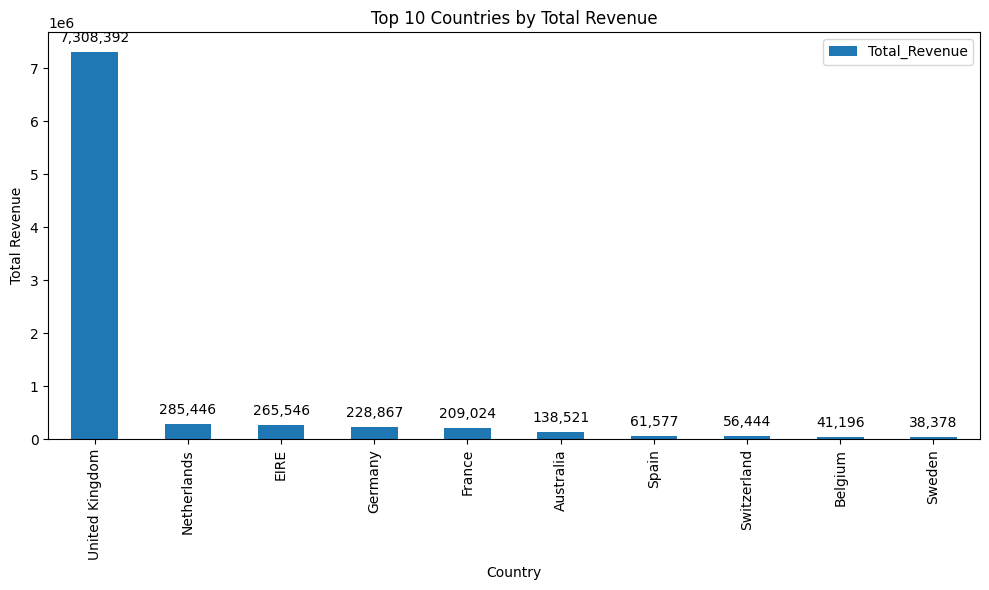

In [262]:
ax = country_summary.sort_values('Total_Revenue', ascending=False).head(10).plot(
    x='Country', y='Total_Revenue', kind='bar', figsize=(10,6)
)
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

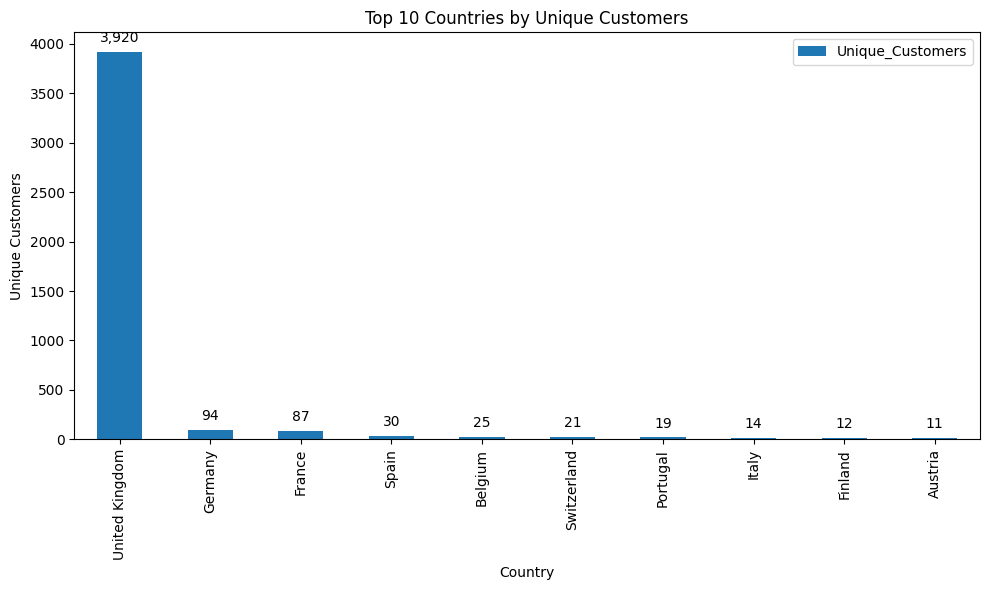

In [263]:
ax = country_summary.sort_values('Unique_Customers', ascending=False).head(10).plot(
    x='Country', y='Unique_Customers', kind='bar', figsize=(10,6)
)
plt.title('Top 10 Countries by Unique Customers')
plt.xlabel('Country')
plt.ylabel('Unique Customers')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

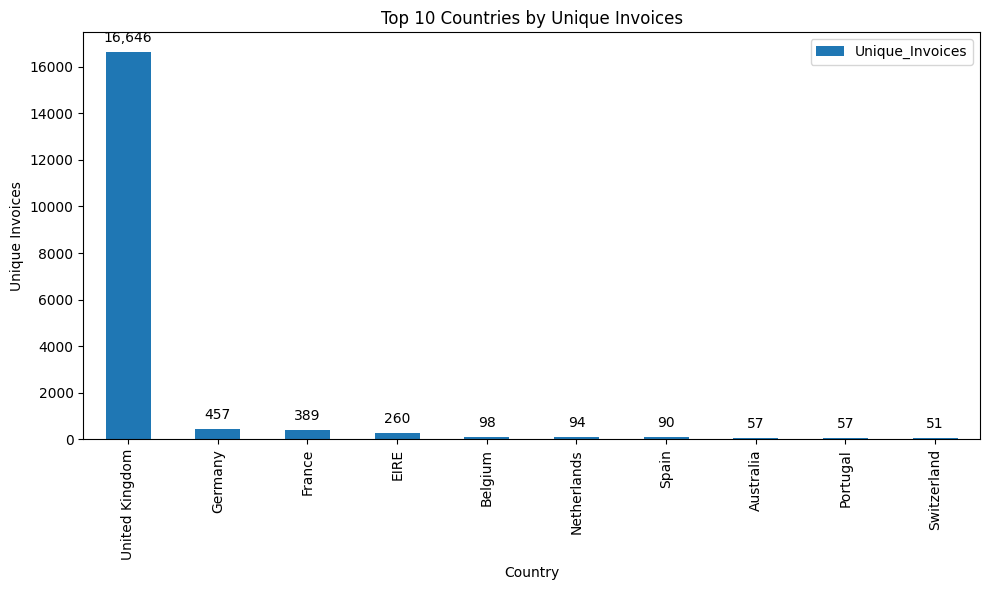

In [264]:
ax = country_summary.sort_values('Unique_Invoices', ascending=False).head(10).plot(
    x='Country', y='Unique_Invoices', kind='bar', figsize=(10,6)
)
plt.title('Top 10 Countries by Unique Invoices')
plt.xlabel('Country')
plt.ylabel('Unique Invoices')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

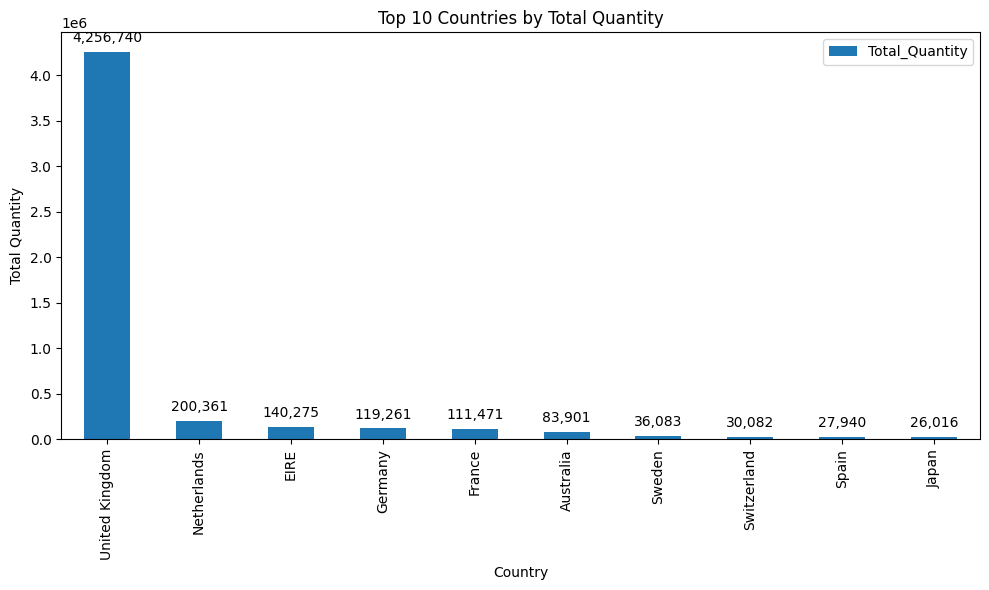

In [265]:
ax = country_summary.sort_values('Total_Quantity', ascending=False).head(10).plot(
    x='Country', y='Total_Quantity', kind='bar', figsize=(10,6)
)
plt.title('Top 10 Countries by Total Quantity')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [266]:
# Create cstock-level business metrics
stock_summary=(
    df.groupby(['StockCode','Description'])
    .agg(
        Unique_Customers=('CustomerID', 'nunique'),
        Unique_Invoices=('InvoiceNo', 'nunique'),
        total_quantity=('Quantity', 'sum'),
        Total_Revenue=('revenue', 'sum')
    )
    .reset_index()
)

#View result
print(stock_summary.nlargest(5,'Total_Revenue'))
print("__________"*10)
print(stock_summary.nlargest(5,'Unique_Customers'))
print("__________"*10)
print(stock_summary.nlargest(5,'Unique_Invoices'))

#Save to CSV
stock_summary.to_csv('Processed_Data/Stock_Level_Business_Metrics.csv', index=False)

     StockCode                         Description  Unique_Customers  \
2399     23843         PAPER CRAFT , LITTLE BIRDIE                 1   
1288     22423            REGENCY CAKESTAND 3 TIER               881   
3233    85123A  WHITE HANGING HEART T-LIGHT HOLDER               856   
3219    85099B             JUMBO BAG RED RETROSPOT               635   
1997     23166      MEDIUM CERAMIC TOP STORAGE JAR               138   

      Unique_Invoices  total_quantity  Total_Revenue  
2399                1           80995      168469.60  
1288             1703           12402      142592.95  
3233             1978           36782      100603.50  
3219             1600           46181       85220.78  
1997              195           77916       81416.73  
____________________________________________________________________________________________________
     StockCode                         Description  Unique_Customers  \
1288     22423            REGENCY CAKESTAND 3 TIER              

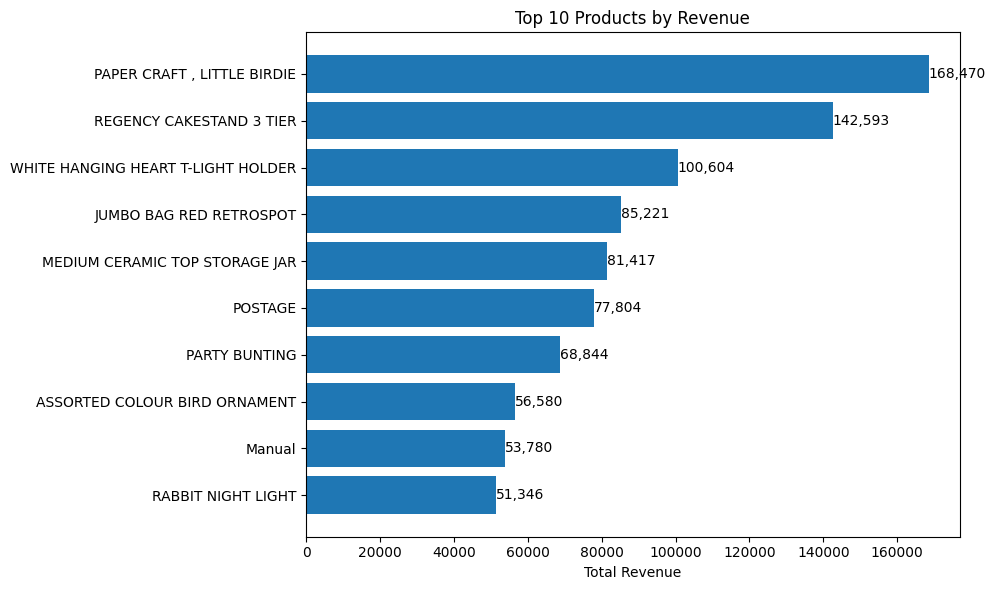

In [267]:
top_rev = stock_summary.nlargest(10, 'Total_Revenue')

plt.figure(figsize=(10,6))
plt.barh(top_rev['Description'], top_rev['Total_Revenue'])
plt.xlabel('Total Revenue')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()
for index, value in enumerate(top_rev['Total_Revenue']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.tight_layout()
plt.show()

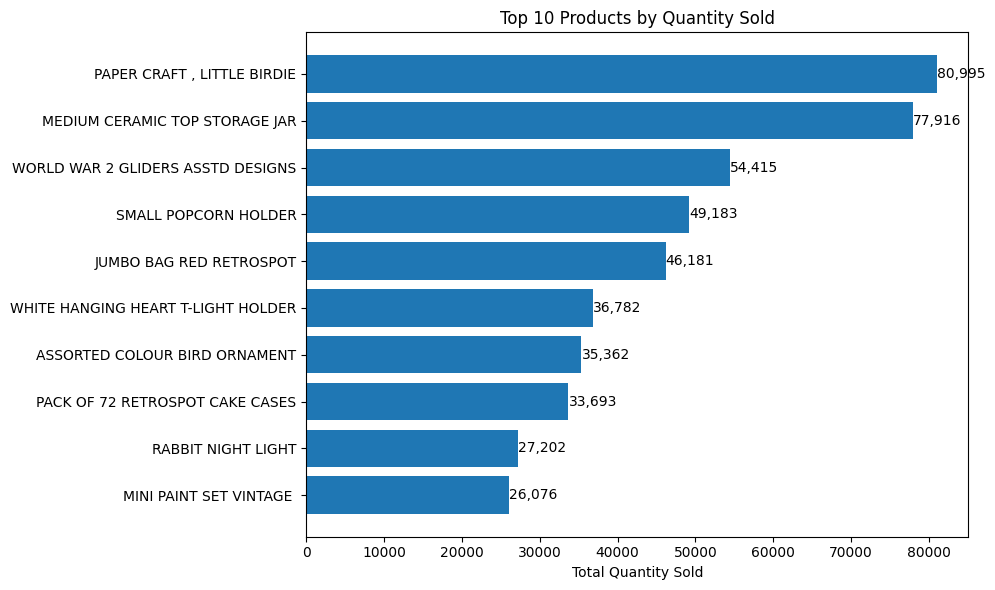

In [268]:
top_qty = stock_summary.nlargest(10, 'total_quantity')

plt.figure(figsize=(10,6))
plt.barh(top_qty['Description'], top_qty['total_quantity'])
plt.xlabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.gca().invert_yaxis()
for index, value in enumerate(top_qty['total_quantity']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.tight_layout()
plt.show()

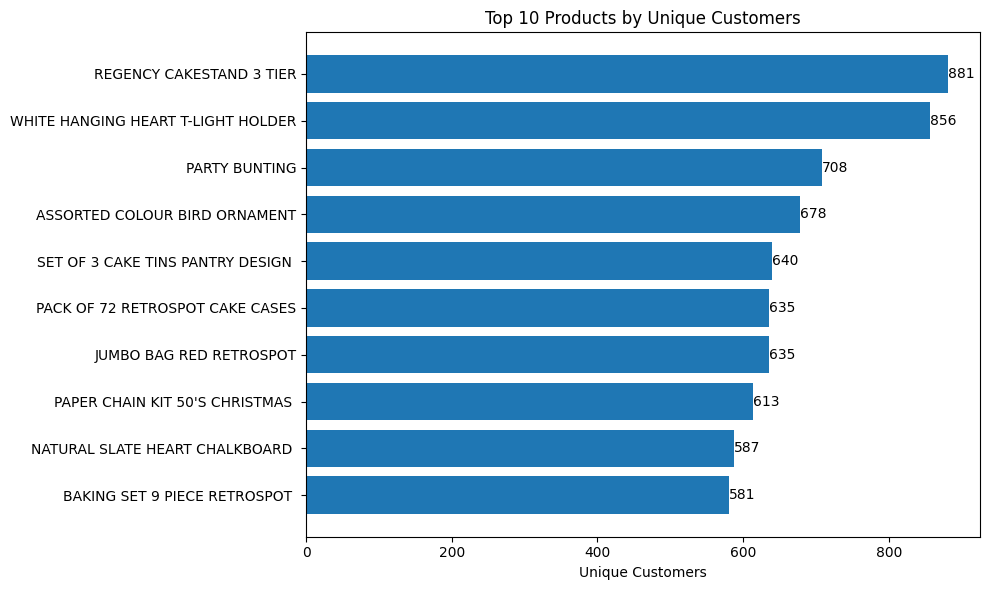

In [269]:
top_cust = stock_summary.nlargest(10, 'Unique_Customers')

plt.figure(figsize=(10,6))
plt.barh(top_cust['Description'], top_cust['Unique_Customers'])
plt.xlabel('Unique Customers')
plt.title('Top 10 Products by Unique Customers')
plt.gca().invert_yaxis()
for index, value in enumerate(top_cust['Unique_Customers']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.tight_layout()
plt.show()

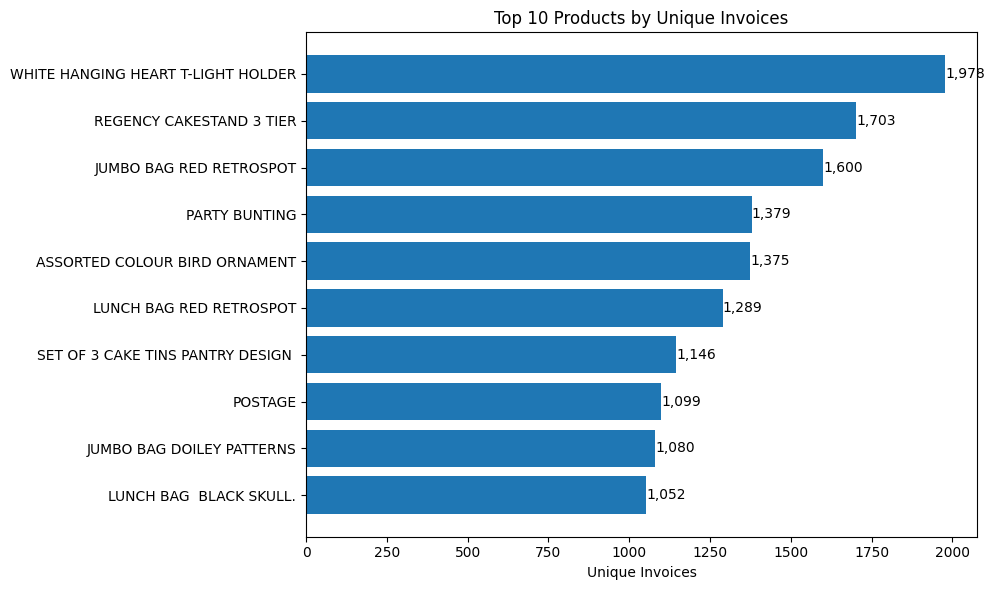

In [270]:
top_inv = stock_summary.nlargest(10, 'Unique_Invoices')

plt.figure(figsize=(10,6))
plt.barh(top_inv['Description'], top_inv['Unique_Invoices'])
plt.xlabel('Unique Invoices')
plt.title('Top 10 Products by Unique Invoices')
plt.gca().invert_yaxis()
for index, value in enumerate(top_inv['Unique_Invoices']):
    plt.text(value, index, f'{value:,.0f}', va='center')
plt.tight_layout()
plt.show()

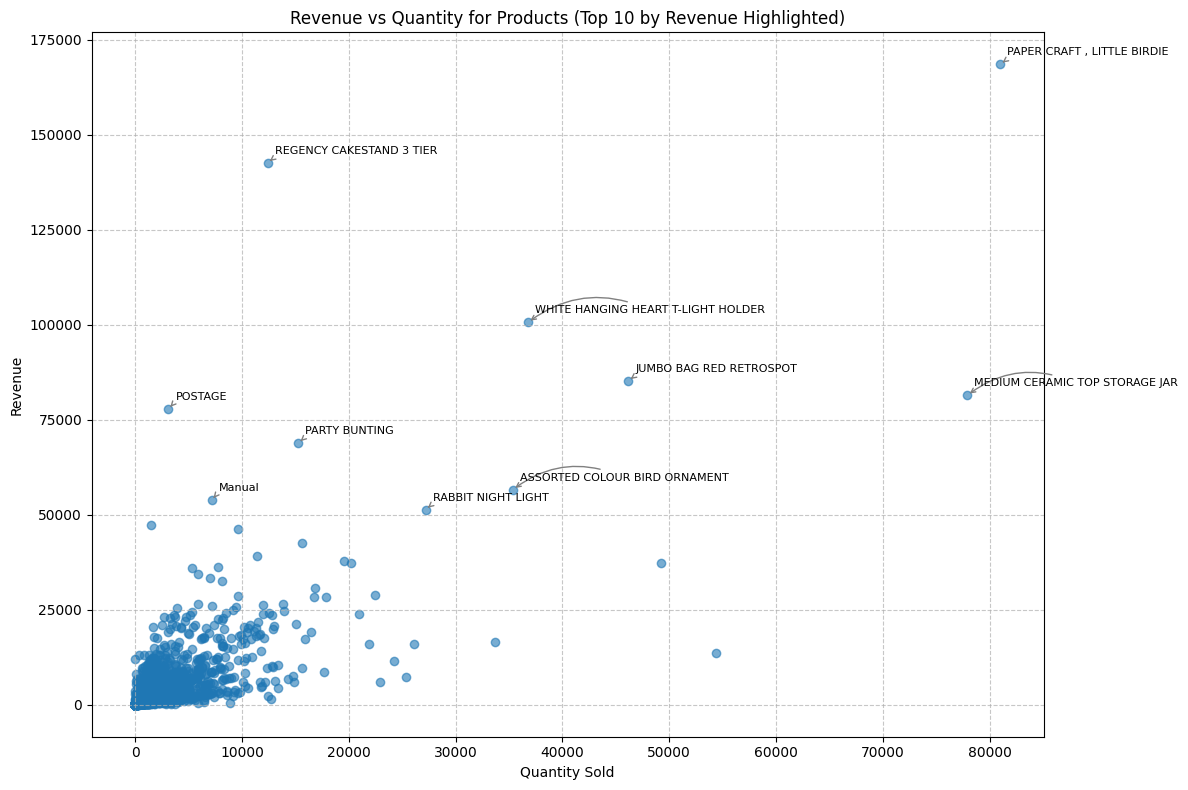

In [271]:
plt.figure(figsize=(12,8))
plt.scatter(stock_summary['total_quantity'], stock_summary['Total_Revenue'], alpha=0.6)
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.title('Revenue vs Quantity for Products (Top 10 by Revenue Highlighted)')

# Annotate top revenue products
for index, row in top_rev.iterrows():
    plt.annotate(
        row['Description'],
        (row['total_quantity'], row['Total_Revenue']),
        textcoords="offset points",
        xytext=(5,5), # Offset for the text from the point
        ha='left',    # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=8,
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='gray') # Add arrow
    )

plt.grid(True, linestyle='--', alpha=0.7) # Add grid for better readability
plt.tight_layout()
plt.show()

In [272]:
stock_summary['Revenue_per_Customer'] = (
    stock_summary['Total_Revenue'] /
    stock_summary['Unique_Customers']
)


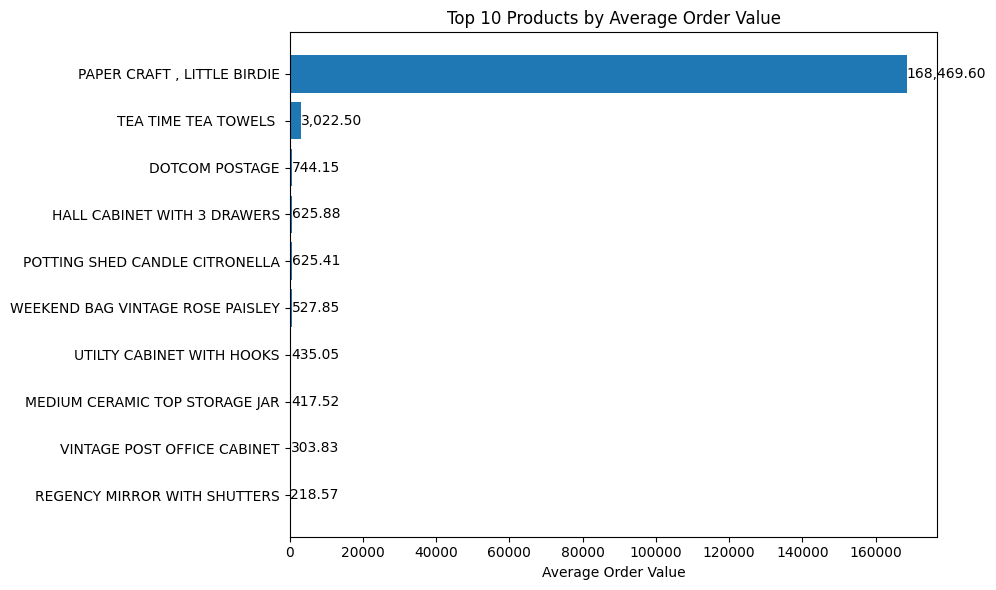

In [273]:
stock_summary['Avg_Order_Value'] = (
    stock_summary['Total_Revenue'] /
    stock_summary['Unique_Invoices']
)

top_avg_order_value = stock_summary.nlargest(10, 'Avg_Order_Value')

plt.figure(figsize=(10,6))
plt.barh(top_avg_order_value['Description'], top_avg_order_value['Avg_Order_Value'])
plt.xlabel('Average Order Value')
plt.title('Top 10 Products by Average Order Value')
plt.gca().invert_yaxis()
for index, value in enumerate(top_avg_order_value['Avg_Order_Value']):
    plt.text(value, index, f'{value:,.2f}', va='center')
plt.tight_layout()
plt.show()

In [274]:
total_revenue=df['revenue'].sum()
total_customers=df['CustomerID'].nunique()
total_invoices=df['InvoiceNo'].nunique()
total_quantity=df['Quantity'].sum()
avg_mom_growth=MOM_Growt.mean()
avg_wow_growth=WOW_Growt.mean()
sales_summary=pd.DataFrame(
    {
        'Total_Revenue': total_revenue,
        'Total_Customers': total_customers,
        'Total_Invoices': total_invoices,
        'Total_Quantity': total_quantity,
        'Avg_MOM_Growth': avg_mom_growth,
        'Avg_WOW_Growth': avg_wow_growth
    },
    index=[0]
)
sales_summary

,Total_Revenue,Total_Customers,Total_Invoices,Total_Quantity,Avg_MOM_Growth,Avg_WOW_Growth
0,8911407.904,4338,18532,5167812,3.339231,7.803822


In [275]:
sales_summary.to_csv('Processed_Data/Sales_Summary.csv', index=False)

In [ ]:
with open('Processed_Data/Retail.csv','w') as f:
  f.write(df.to_csv(index=False))

In [ ]:
#---------------------DATA INSIGHTS-------------------------
#There are about 4338 unique Customers.
#18532 unique Invoice numbers are recorded.
#There are about 5167812 quantity of stocks are purchased in total.
#Total Revenue Over 12-2010 to 12-2011 is about 8911407.904.
#The revenue growth monthly increases of 7.77 at average.
#The revenue growth weekly increases of 7.80 at average.
#Highest downfall of revenue at December 2011.
#Highest revenue generated at November 2011.
#United Kingdom is top 1 at Revenue generation, Number of Customers and Number of Invoices.
#Paper Craft, Little Birdie is top revenue generating stock but was purchasing by single customer with a large Quantity.
#Regency Cake Stand 3 tier have highest number of unique Customers.
#White hanging heart t-light holder have highest number of Invoices.